# INF-616 - Exercício 2 - Aula 3/4: *support vector machines*

Professor: Ricardo da Silva Torres -- rtorres@ic.unicamp.br

Professor: Alexandre Ferreira -- melloferreira@ic.unicamp.br  

Monitor: Lucas David -- lucasolivdavid@gmail.com

Este *notebook* faz parte da disciplina INF-616 no curso de extensão MDC.  
Demais artefatos podem ser encontrados no moodle da disciplina: 
[moodle.lab.ic.unicamp.br/332](https://moodle.lab.ic.unicamp.br/moodle/course/view.php?id=332)

Instituto de Computação - Unicamp 2019

In [1]:
from __future__ import print_function

from math import ceil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split

import seaborn as sns

from IPython.display import display

In [2]:
np.random.seed(1082141)
sns.set()

## Classificando imagens de dígitos
### Lendo o conjunto de dados

**Pen-Based Recognition of Handwritten Digits Data Set**
é um banco de imagens simples e bem conhecido em reconhecimento de imagens.  
Ele é composto por imagens em escala cinza de 8 por 8 pixels divididas em 10 classes de dígitos.

Uma descrição completa pode ser encontrada no seguinte link: [archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits](http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits)

In [3]:
x, y = datasets.load_digits(return_X_y=True)

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=.5)
print('samples in train: %i' % x_train.shape[0],
      'samples in test: %i' % x_test.shape[0],
      'features: %i' % x_train.shape[1],
      'classes: %i' % (np.max(y_train) + 1),
      sep='\n', end='\n\n')
print(x_train.shape, x_test.shape)

samples in train: 898
samples in test: 899
features: 64
classes: 10

(898, 64) (899, 64)


### 64 primeiras amostras no conjunto de treinamento

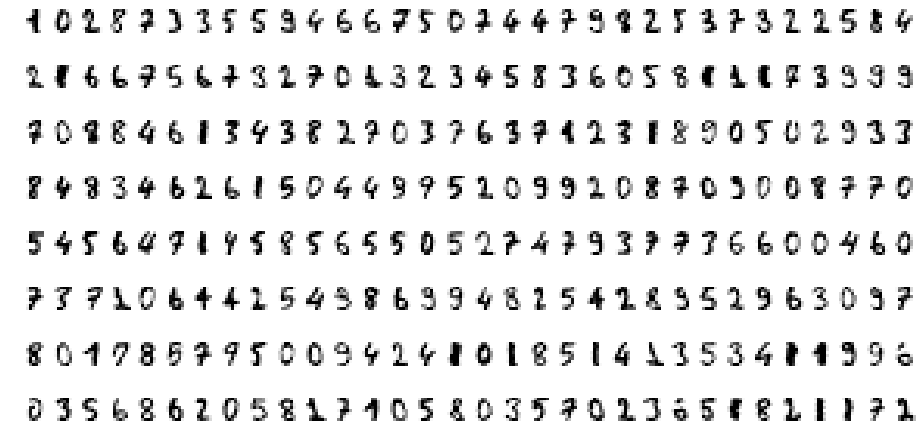

In [4]:
plt.figure(figsize=(16, 8))

for ix in range(8  * 32):
    plt.subplot(8, 32, ix + 1)
    plt.imshow(x_train[ix].reshape(8, 8), cmap='Greys')
    plt.axis('off')

### Visualizando o conjunto e frequências das classes

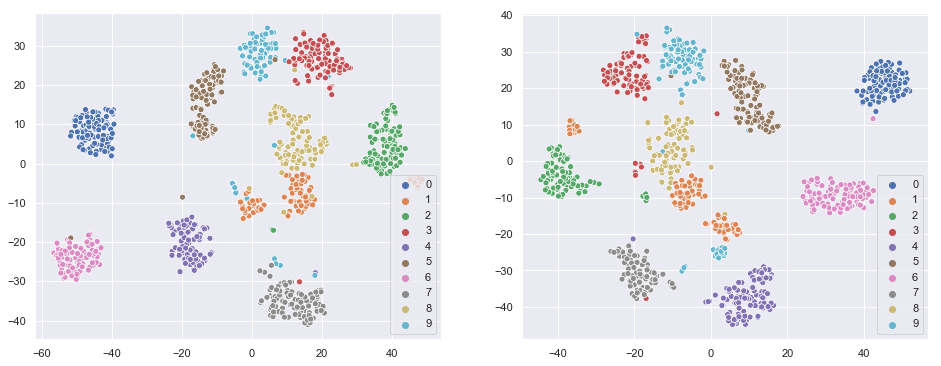

In [5]:
from sklearn.manifold import TSNE

encoder2D = TSNE()
w_train = encoder2D.fit_transform(x_train)
w_test = encoder2D.fit_transform(x_test)

plt.figure(figsize=(16, 6))
categorical_colors = sns.color_palette()

for ix, (x, y) in enumerate(((w_train, y_train), (w_test, y_test))):
    plt.subplot(1, 2, ix + 1)
    sns.scatterplot(*x.T, hue=y, palette=categorical_colors);

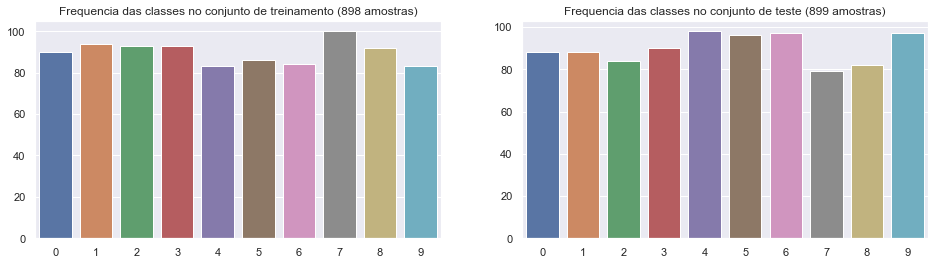

In [6]:
plt.figure(figsize=(16, 4))

plt.subplot(121)
plt.title('Frequencia das classes no conjunto de treinamento (%i amostras)' % len(x_train))
labels, counts = np.unique(y_train, return_counts=True)
sns.barplot(labels, counts)

plt.subplot(122)
plt.title('Frequencia das classes no conjunto de teste (%i amostras)' % len(x_test))
labels, counts = np.unique(y_test, return_counts=True)
sns.barplot(labels, counts);

### Modelando um classificador de digitos

**Atividade (3 pts):** defina e treine uma máquina de vetor de suporte com kernel RBF, utilizando o scikit-learn.  
Lembre-se que este estimador é extremamente sensível à dados desnormalizados,
o que torna o pre-processamento um passo indispensável.

In [7]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

sv = make_pipeline(
        StandardScaler(),
        SVC())

sv.fit(x_train, y_train)

/mnt/files/envs/mdc/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

### Avaliando o modelo treinado

In [8]:
from sklearn import metrics

predictions = sv.predict(x_test)
probabilities = sv.decision_function(x_test)

print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        88
           1       0.95      0.99      0.97        88
           2       0.99      0.96      0.98        84
           3       1.00      0.92      0.96        90
           4       0.95      0.95      0.95        98
           5       0.99      0.96      0.97        96
           6       0.99      0.98      0.98        97
           7       0.95      1.00      0.98        79
           8       0.92      0.98      0.95        82
           9       0.97      0.97      0.97        97

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



Em problemas envolvendo muitas classes, simplesmente exibir a matriz de confusão
com a função `print` gera uma representação difícil de ler.  
Veja este exemplo:

In [9]:
metrics.confusion_matrix(y_test, predictions)

array([[88,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 87,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0, 81,  0,  2,  0,  0,  1,  0,  0],
       [ 0,  0,  1, 83,  1,  1,  0,  1,  3,  0],
       [ 0,  1,  0,  0, 93,  0,  0,  2,  1,  1],
       [ 0,  0,  0,  0,  1, 92,  0,  0,  1,  2],
       [ 0,  1,  0,  0,  0,  0, 95,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 79,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 80,  0],
       [ 0,  1,  0,  0,  0,  0,  1,  0,  1, 94]])

Nós podemos melhorar este efeito utilizando um `heatmap`,
onde a grandeza dos valores se torna diretamente proporcional à intensidade da cor adjacente.

**Atividade (1 pt):** calcule a matriz de confusão relativa $R$, que guarda porcentagens de incidências em vez das contagens absolutas. Finalmente, utilize o `heatmap` do seaborn para exibir a matriz alcançada.


Dica: seja $C = \{c_{ij}\}_{10\times 10}$ a matrix de confusão original, $R = \{r_{ij} | r_{ij} := \frac{c_{ij}}{\sum_k c_{ik} }\}$.

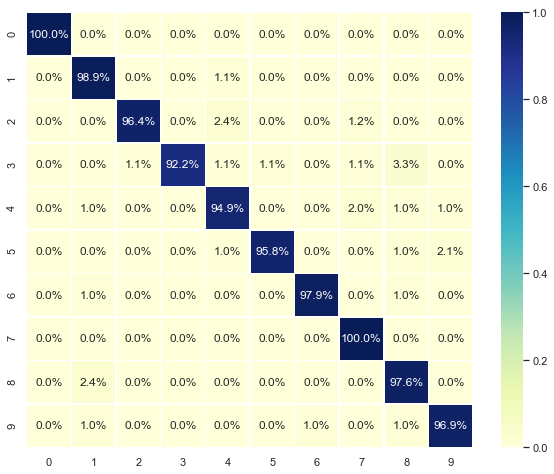

In [10]:
c = metrics.confusion_matrix(y_test, predictions)
r = c / c.sum(axis=1, keepdims=True)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(r, linewidths=.5, cmap='YlGnBu', annot=True, fmt='.1%');

**Pergunta (1 pt):** quais dígitos são confundidos com maior frequência no conjunto de teste?

R:

- O dígito 3 é confundido com o 8 em 3.3% dos casos
- O dígito 2 é confundido com 4 com probabilidade 2.4%
- Os dígitos 8 e 1 são confundidos em 2.4% dos casos

## Support Vector Machine Regressors

O conjunto *Doctor feeds prediction* contém uma relação entre um conjunto de características associadas à um médico atendente e o preço da consulta cobrada. O objetivo é **regredir** este valor o mais próximo possível do valor esperado.   
Ele pode ser encontrado no seguinte link: [kaggle.com/nitin194/doctor-fees-prediction](https://www.kaggle.com/nitin194/doctor-fees-prediction)

In [11]:
train, test = (pd.read_csv(f'../datasets/doctor-fees/{stage}.csv')
               for stage in ('train', 'test'))

#### Pre-processamento dos dados para um formato mais limpo

- Remove uma linha inválida, contendo `"years experience"` como valor para a coluna qualificação
- Preenche todos os `Place` e `Profile` com valor igual à `NaN` com a tag `unknown`

In [12]:
def preprocess(frame):
    frame['Rating'] = frame['Rating'].str.replace('%', '').astype(float) / 100.0
    frame['Experience'] = frame['Experience'].str.replace('years experience', '').astype(float)
    frame['Qualification'] = frame['Qualification'].str.replace('[^a-zA-Z]', ' ').str.lower()
    frame['Place'] = frame['Place'].str.replace('[^a-zA-Z]', ' ').str.lower()

preprocess(train)
preprocess(test)

In [13]:
invalid_row = train['Qualification'].str.contains('years experience')
train = train[~invalid_row]

In [14]:
train.fillna({'Place': 'unknown', 'Profile': 'unknown'}, inplace=True);
test.fillna({'Place': 'unknown', 'Profile': 'unknown'}, inplace=True);

In [15]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,bhms md homeopathy,24.0,1.00,kakkanad ernakulam,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,bams md ayurveda medicine,12.0,0.98,whitefield bangalore,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,mbbs ms otorhinolaryngology,9.0,NaN,mathikere bel bangalore,ENT Specialist,NaN,300
3,bsc zoology bams,12.0,NaN,bannerghatta road bangalore,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,bams,20.0,1.00,keelkattalai chennai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


### Exibindo frequência com que as qualificações, locais e perfis ocorrem nos conjuntos

In [16]:
def plot_feature_freq(frame, feature, showing=30):
    labels, counts = np.unique(frame[feature].dropna(), return_counts=True)

    # ordena pelas mais frequentes
    p = np.argsort(counts)[::-1]
    labels, counts = labels[p], counts[p]

    g = sns.barplot(labels[:showing], counts[:showing])
    g.set_xticklabels(labels[:showing], rotation=90)
    
    return g

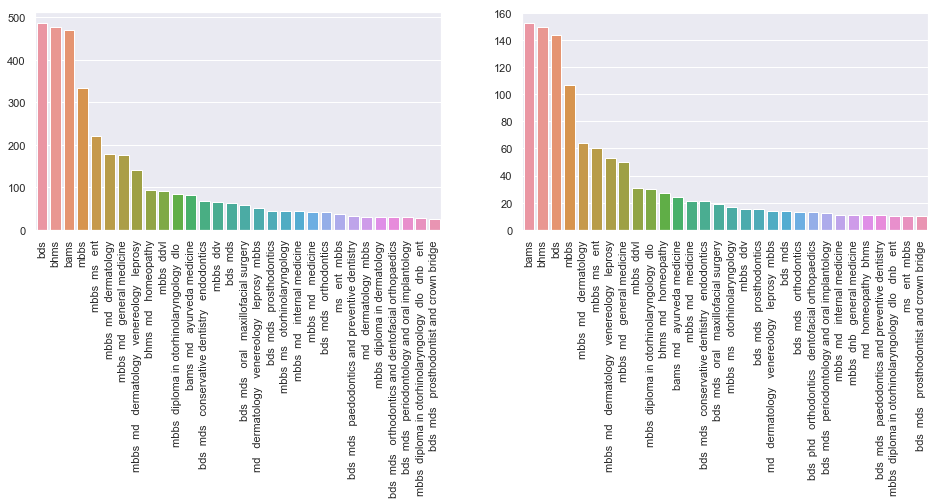

In [17]:
plt.figure(figsize=(16, 4))

plt.subplot(121)
plot_feature_freq(train, 'Qualification')

plt.subplot(122)
plot_feature_freq(test, 'Qualification')

qualifications, counts = np.unique(train['Qualification'].dropna(), return_counts=True)
p = np.argsort(counts)[::-1]
qualifications = qualifications[p];

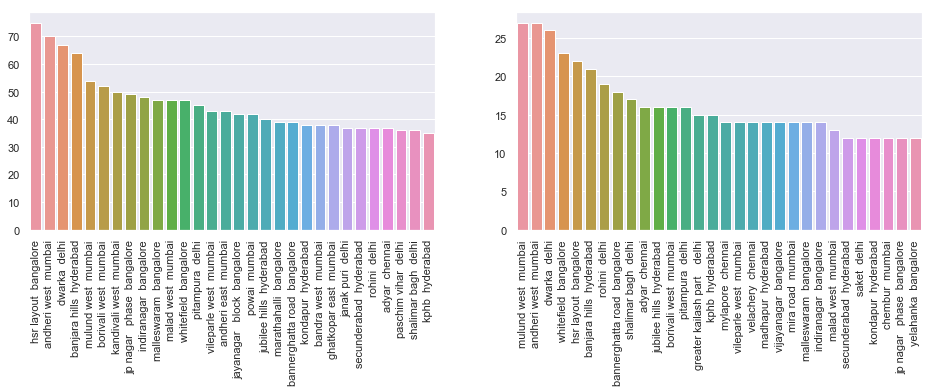

In [18]:
plt.figure(figsize=(16, 4))

plt.subplot(121)
plot_feature_freq(train, 'Place')

plt.subplot(122)
plot_feature_freq(test, 'Place')

places, counts = np.unique(train['Place'].dropna(), return_counts=True)
p = np.argsort(counts)[::-1]
places = places[p];

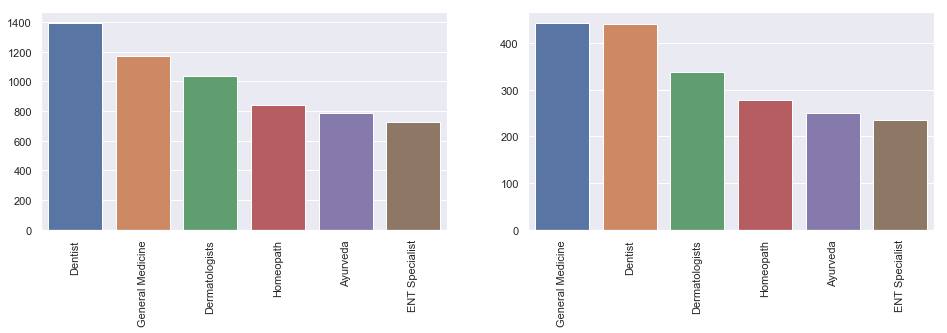

In [19]:
plt.figure(figsize=(16, 4))

plt.subplot(121)
plot_feature_freq(train, 'Profile')

plt.subplot(122)
plot_feature_freq(test, 'Profile');

### Modelando um regressor de custo de consulta

Vamos codificar as características categóricas usando o one-hot encoding.  
Entretanto, dado o alto número de ocorrências únicas, nós consideramos somente os 200 valores de maior frequência.

As características contínuas são simplesmente normalizadas com o `StandardScaler`.

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

retained_qualif = qualifications[:200].tolist()
retained_places = places[:200].tolist()

qualif_places_enc = OneHotEncoder(categories=[retained_qualif, retained_places], handle_unknown='ignore')
profile_enc = OneHotEncoder()
continuous_enc = make_pipeline(SimpleImputer(strategy='median'),
                               StandardScaler())

encoder = ColumnTransformer([
  ('q_pla', qualif_places_enc, ['Qualification', 'Place']),
  ('prof', profile_enc, ['Profile']),
  ('ex_ra', continuous_enc, ['Experience', 'Rating'])
])

train_e = encoder.fit_transform(train)
test_e = encoder.transform(test)

fee_enc = StandardScaler()
ye_train = fee_enc.fit_transform(train[['Fees']].astype(float)).ravel()

**Atividade (4 pts):** treine dois ou mais regressores --- onde ao menos um é baseado em *máquina de vetor de suporte* --- e reporte o seus respectivos erros quadráticos médios (MSE) sobre as porções de validação separadas. Respeite as seguintes regras:

- Utilize a estratégia 5-3 para fazer a validação cruzada dos resultados e buscar hiperparâmetros
- Busque ao menos dois parâmetros em cada regressor

In [21]:
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor


estimators = [
    (LinearRegression(), {'fit_intercept': [True, False], 'normalize': [True, False]}),
    (SVR(), {'C': [.001, .01, .1, 1., 10.], 'gamma': ['auto', 'scale']}),
    (RandomForestRegressor(), {'n_estimators': [10, 50, 100]}),
    (AdaBoostRegressor(), {'n_estimators': [10, 50, 100]})
]

results = [cross_validate(GridSearchCV(e, params, cv=3), train_e, ye_train,
                          cv=5, verbose=2, n_jobs=-1,
                          scoring='neg_mean_squared_error')
           for e, params in estimators]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.0s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   46.9s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   57.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   57.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   39.1s remaining:   58.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   49.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   49.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent worker

In [22]:
pd.DataFrame({type(e).__name__: pd.DataFrame(r).mean()
              for (e, params), r in zip(estimators, results)}).T

,fit_time,score_time,test_score
LinearRegression,0.491195,0.000392,-0.837549
SVR,50.732264,0.227354,-0.788480
RandomForestRegressor,43.358721,0.054322,-0.909209
AdaBoostRegressor,0.732710,0.002704,-0.923412


**Pergunta (1pt):** que estimador apresentou os melhores resultados?

R: O SVR apresentou a melhor pontuação média sobre as *folds* de validação na validação cruzada, já que este produziu o maior erro médio quadrático negativo e, portanto, menor erro médio quadrático.

Podemos retreinar o SVR sobre todo o conjunto de treino e estimar as amostras no conjunto de teste:

In [23]:
svr = GridSearchCV(*estimators[1], cv=3)
svr.fit(train_e, ye_train)

test_predictions = svr.predict(test_e)
test_predictions = fee_enc.inverse_transform(test_predictions)

In [24]:
pd.DataFrame({ 'predicted-fee': test_predictions.round(2) })

,predicted-fee
0,239.07
1,250.24
2,464.50
3,165.62
4,286.83
5,199.34
6,258.47
7,204.59
8,196.51
9,187.82
